# Supply Optimization

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('data/data.csv')

In [83]:
df['date'] = pd.to_datetime(df['Date'])

In [84]:
df['day'] = (df['date']).dt.day
df['month'] = (df['date']).dt.month
df['year'] = (df['date']).dt.year
df['day_of_week'] = (df['date']).dt.dayofweek

In [85]:
df['Time'] = pd.to_datetime(df['Time'])

In [86]:
df['Hour'] = (df['Time']).dt.hour

## EDA - Exploratory df Analysis

In [87]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,date,day,month,year,day_of_week,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,4,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,6,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,6,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,4,10


In [88]:
df.shape

(1000, 23)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   object        
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [90]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
date                       0
day                        0
month                      0
year                       0
day_of_week                0
Hour                       0
dtype: int64

In [91]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating,date,day,month,year,day_of_week,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2024-12-19 15:24:41.880000,307.58738,4.761905e+00,15.379369,6.97270,2019-02-14 00:05:45.600000,15.256000,1.993000,2019.0,3.032000,14.910000
min,10.080000,1.000000,0.508500,10.678500,2024-12-19 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,2019-01-01 00:00:00,1.000000,1.000000,2019.0,0.000000,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2024-12-19 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,2019-01-24 00:00:00,8.000000,1.000000,2019.0,1.000000,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2024-12-19 15:19:00,241.76000,4.761905e+00,12.088000,7.00000,2019-02-13 00:00:00,15.000000,2.000000,2019.0,3.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2024-12-19 18:15:00,448.90500,4.761905e+00,22.445250,8.50000,2019-03-08 00:00:00,23.000000,3.000000,2019.0,5.000000,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2024-12-19 20:59:00,993.00000,4.761905e+00,49.650000,10.00000,2019-03-30 00:00:00,31.000000,3.000000,2019.0,6.000000,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858,NaN,8.693563,0.835254,0.0,1.973543,3.186857


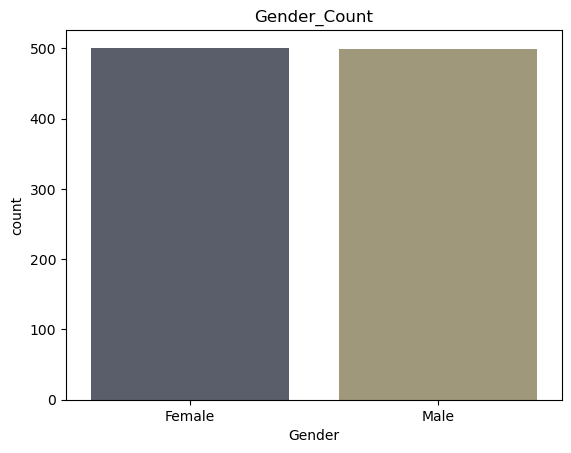

In [92]:
sns.countplot(x="Gender", data =df, palette="cividis").set_title("Gender_Count");

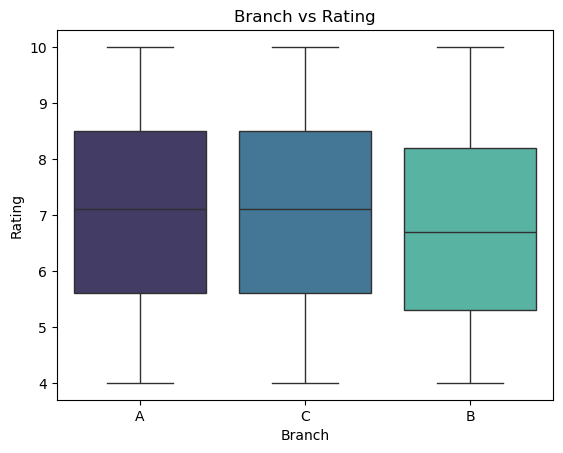

In [93]:
sns.boxplot(x="Branch", y = "Rating" ,data =df, palette="mako").set_title("Branch vs Rating");

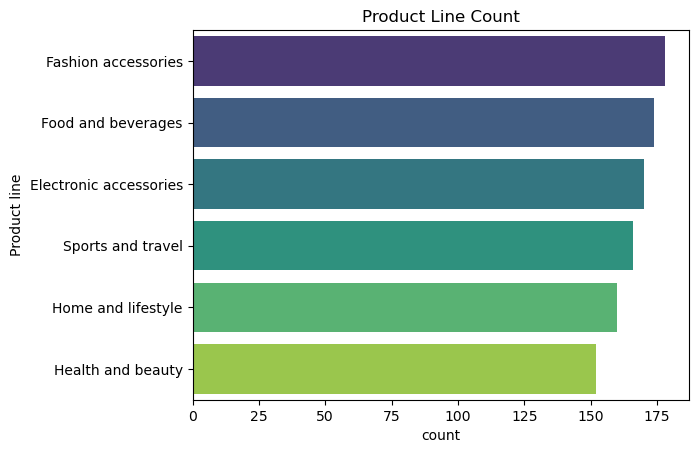

In [94]:


sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index , palette="viridis").set_title("Product Line Count");



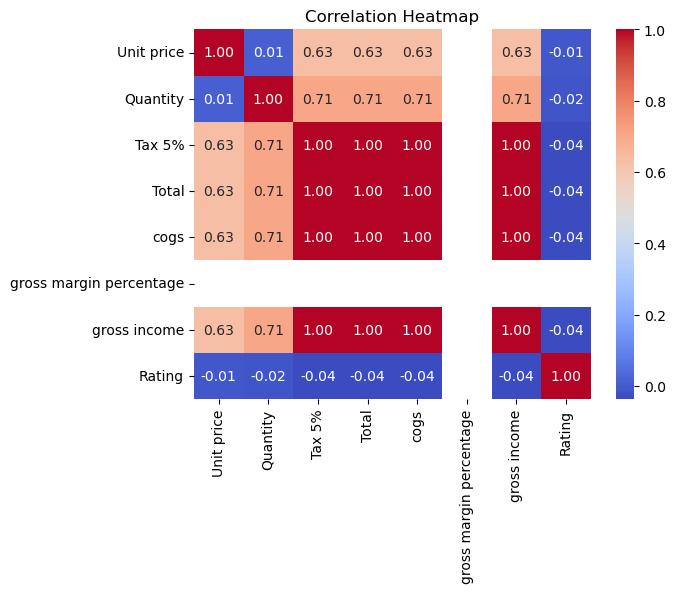

In [95]:
numerical_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
correlation = df[numerical_columns].corr()

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


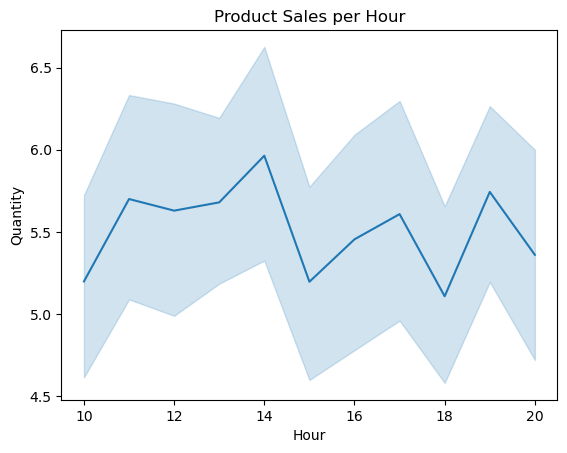

In [96]:
sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour");

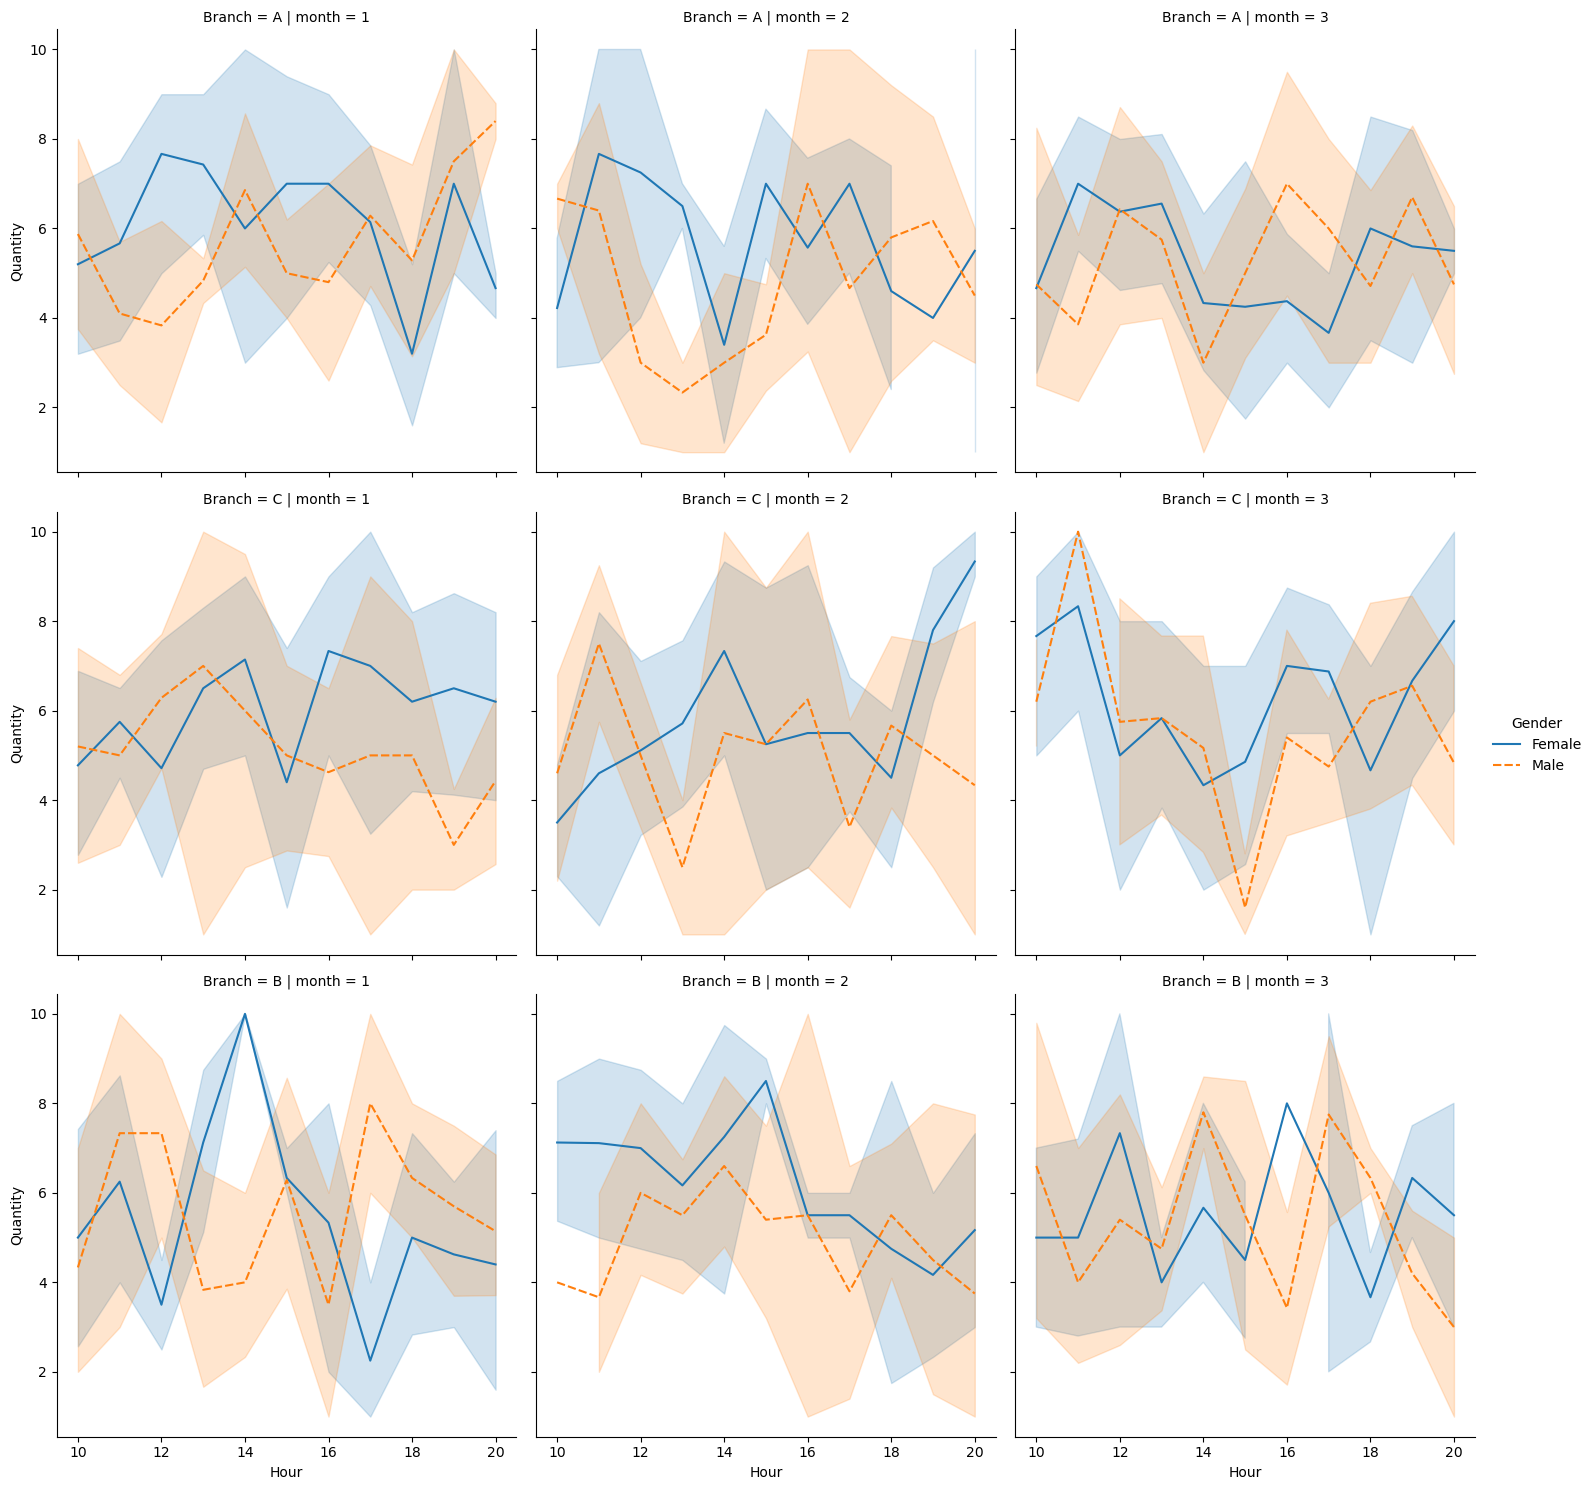

In [97]:
sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =df);

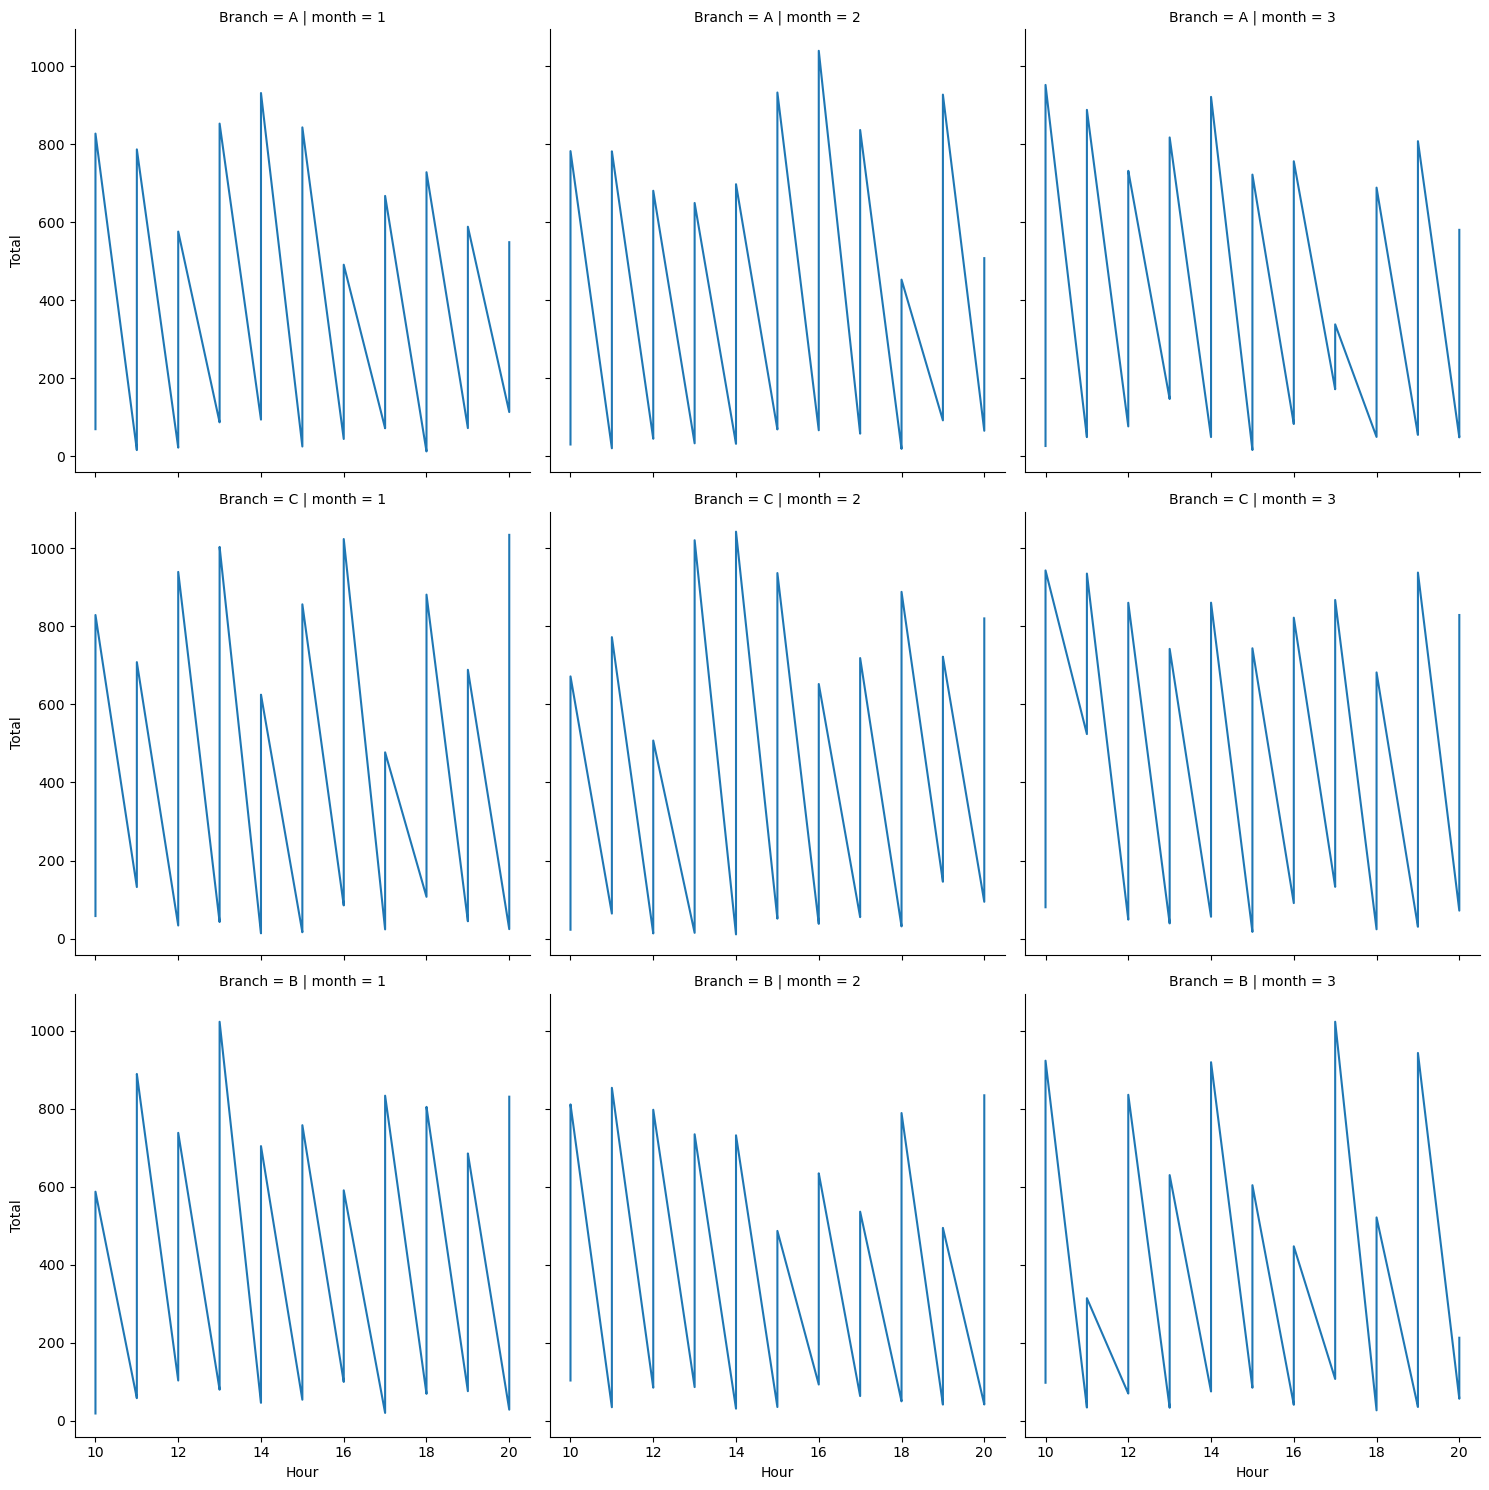

In [98]:
sns.relplot(x="Hour",  y = 'Total', col= 'month' , row= 'Branch', estimator = None, kind="line", data =df);

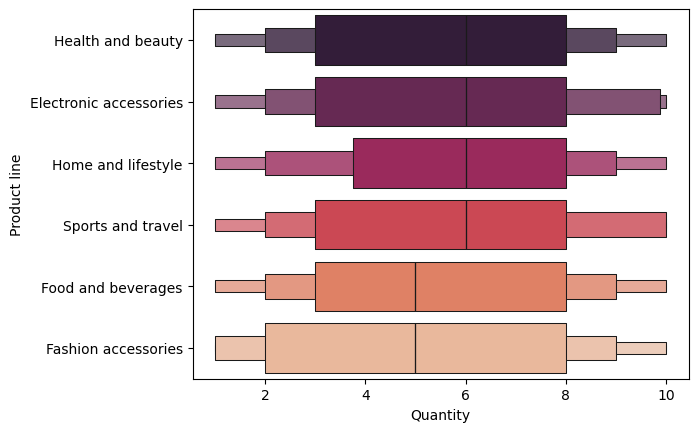

In [99]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df, palette="rocket");

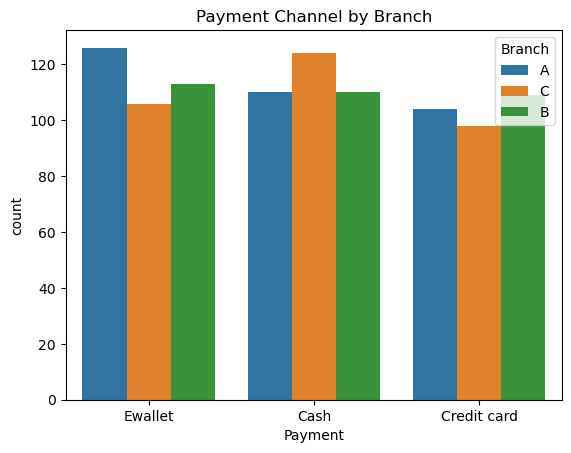

In [100]:
sns.countplot(x="Payment", hue = "Branch", data =df).set_title("Payment Channel by Branch");

In [101]:
monthly_sales = df.groupby('month')['Total'].sum().reset_index()
sns.barplot(x='month', y='Total', df=monthly_sales, palette='viridis').set_title("Monthly Sales");


ValueError: Could not interpret value `month` for `x`. Value is a string, but `data` was not passed.

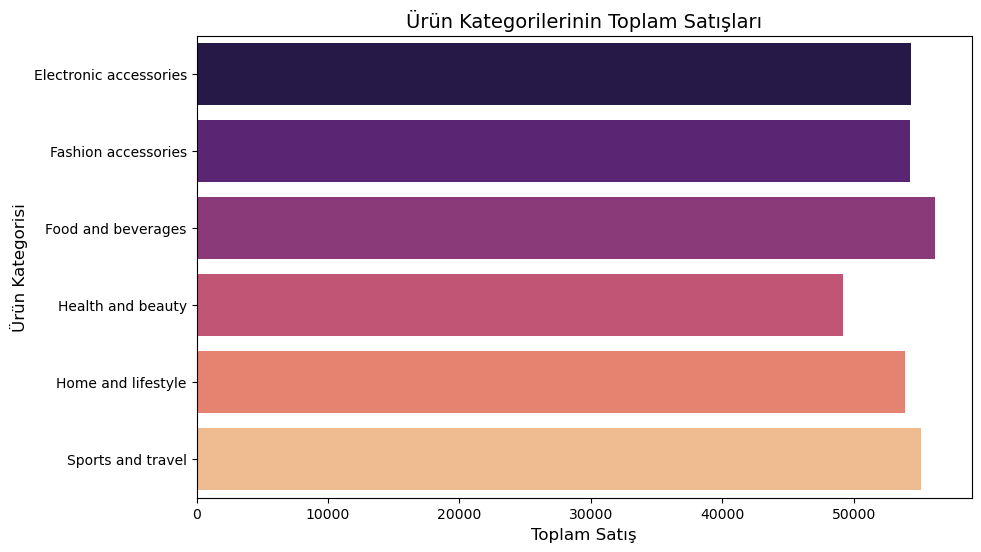

In [60]:
product_sales = df.groupby('Product line')['Total'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(y='Product line', x='Total', data=product_sales, palette='magma')
plt.title('Ürün Kategorilerinin Toplam Satışları', fontsize=14)
plt.xlabel('Toplam Satış', fontsize=12)
plt.ylabel('Ürün Kategorisi', fontsize=12)
plt.show()

En İyi Model Parametreleri: None
En Düşük AIC: inf


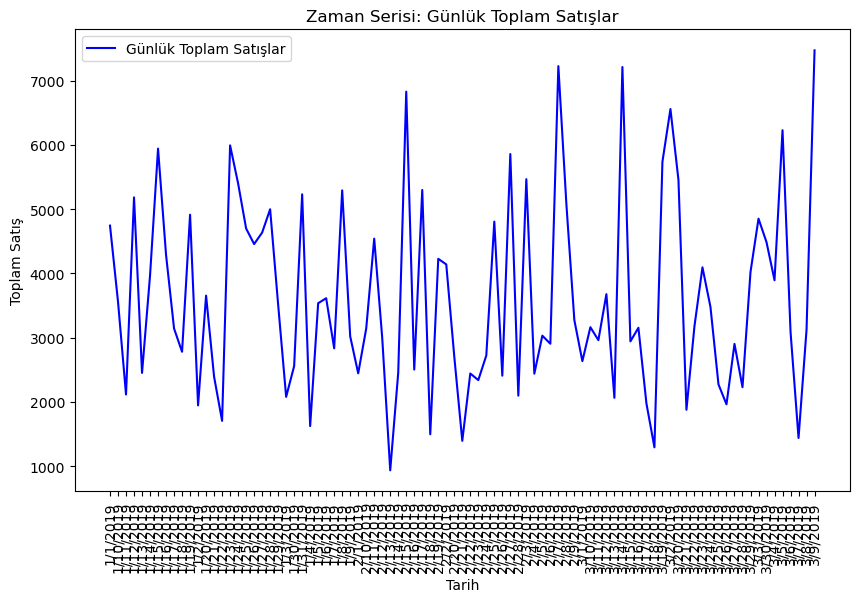

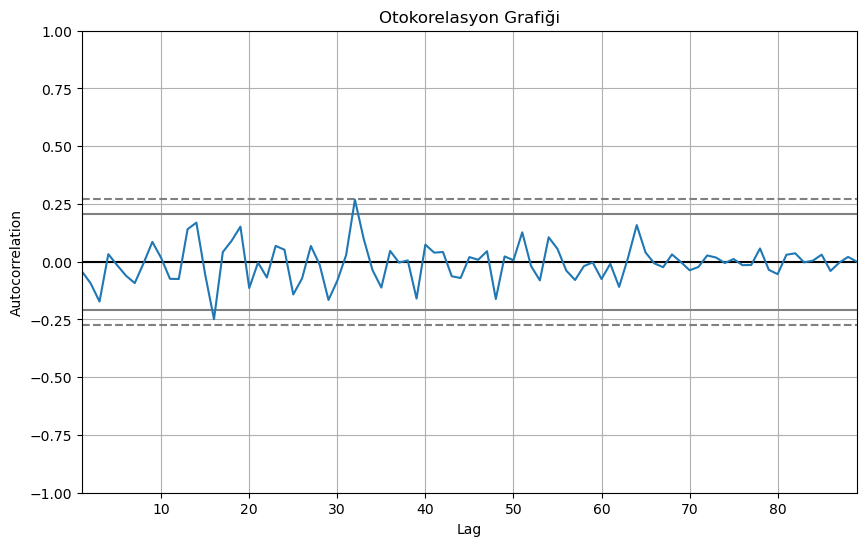

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   71
Model:                ARIMA(12, 1, 0)   Log Likelihood                -610.515
Date:                Thu, 19 Dec 2024   AIC                           1247.029
Time:                        22:13:36   BIC                           1276.260
Sample:                             0   HQIC                          1258.640
                                 - 71                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0366      0.139     -7.484      0.000      -1.308      -0.765
ar.L2         -0.9074      0.199     -4.550      0.000      -1.298      -0.517
ar.L3         -0.9175      0.247     -3.711      0.0

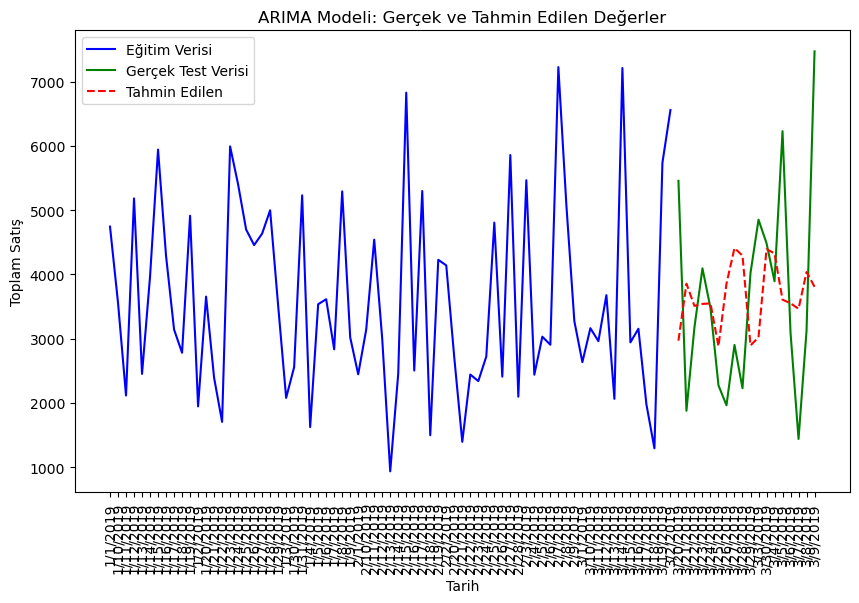

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split

# Tarih bazında toplam satışları hesaplıyoruz.
daily_sales = df.groupby('Date')['Total'].sum().reset_index()
daily_sales.set_index('Date', inplace=True)

# Zaman serisini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(daily_sales, label='Günlük Toplam Satışlar', color='blue')
plt.title('Zaman Serisi: Günlük Toplam Satışlar')
plt.xlabel('Tarih')
plt.ylabel('Toplam Satış')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Veriyi eğitim ve test olarak bölme
train_size = int(len(daily_sales) * 0.8)
train_df, test_df = daily_sales[:train_size], daily_sales[train_size:]

# ARIMA modeli için parametrelerin belirlenmesi (p, d, q)
# Öncelikle otomatik korelasyon grafiği
plt.figure(figsize=(10, 6))
autocorrelation_plot(daily_sales)
plt.title('Otokorelasyon Grafiği')
plt.show()

# ARIMA Modeli
model = ARIMA(train_df, order=(12, 1, 0))  # Örnek parametreler (p=5, d=1, q=0)
model_fit = model.fit()



# Model Özeti
print(model_fit.summary())

# Tahminler
forecast = model_fit.forecast(steps=len(test_df))

# Test verileri ve tahminleri görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(train_df, label='Eğitim Verisi', color='blue')
plt.plot(test_df, label='Gerçek Test Verisi', color='green')
plt.plot(test_df.index, forecast, label='Tahmin Edilen', color='red', linestyle='--')
plt.title('ARIMA Modeli: Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Tarih')
plt.ylabel('Toplam Satış')
plt.xticks(rotation=90)
plt.legend()
plt.show()


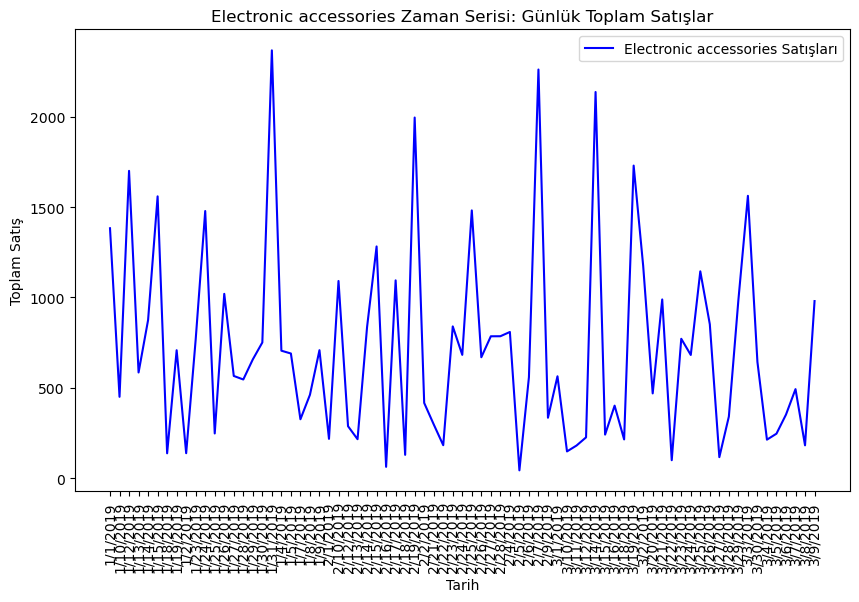

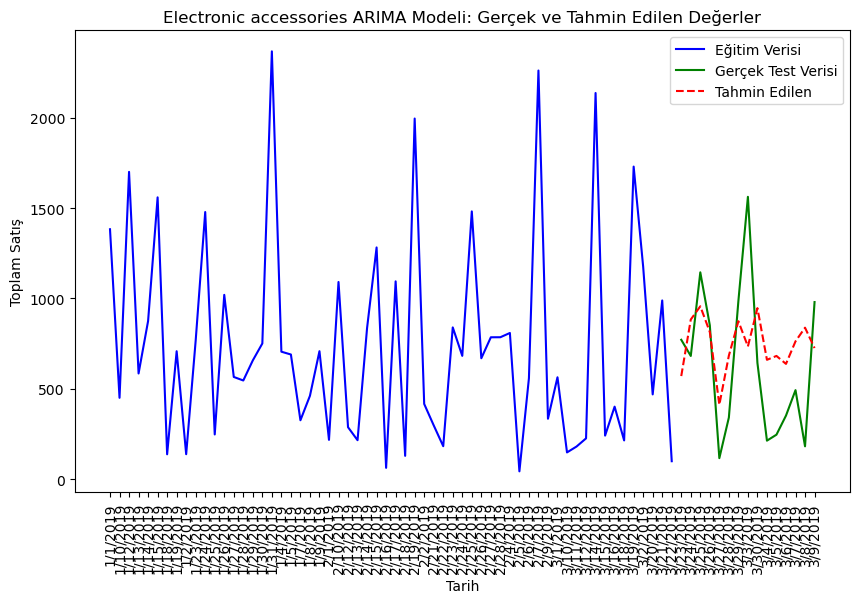


Electronic accessories için başarı metrikleri:
Mean Squared Error (MSE): 143342.83
Mean Absolute Error (MAE): 323.71
Root Mean Squared Error (RMSE): 378.61


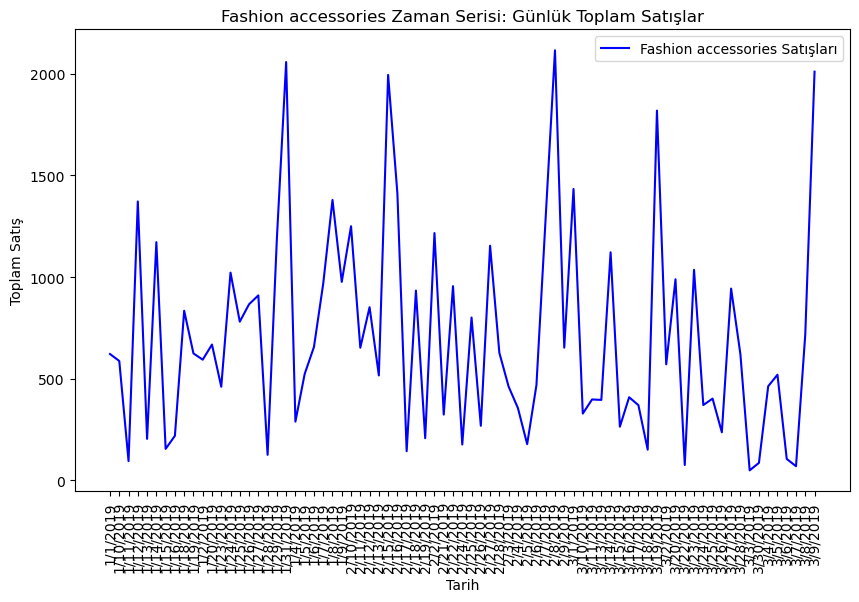

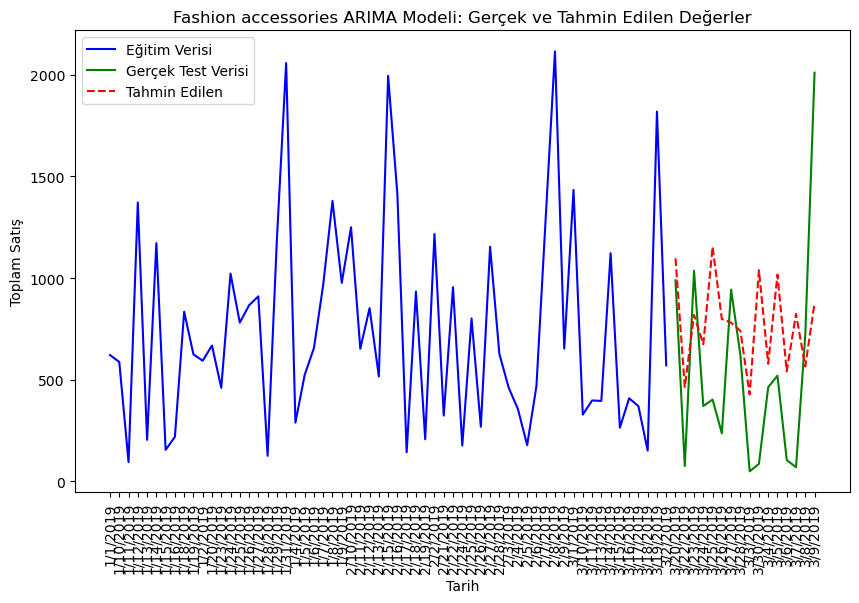


Fashion accessories için başarı metrikleri:
Mean Squared Error (MSE): 287933.23
Mean Absolute Error (MAE): 439.86
Root Mean Squared Error (RMSE): 536.59


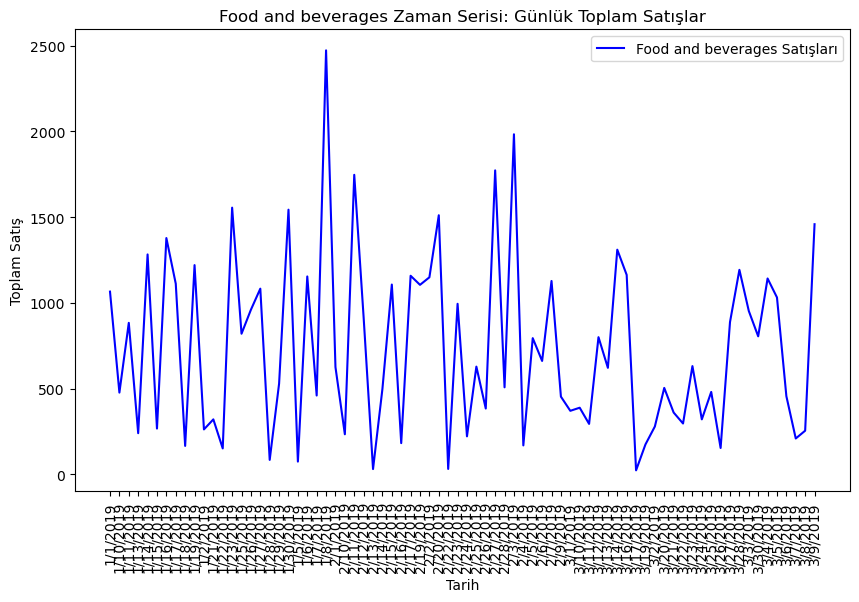

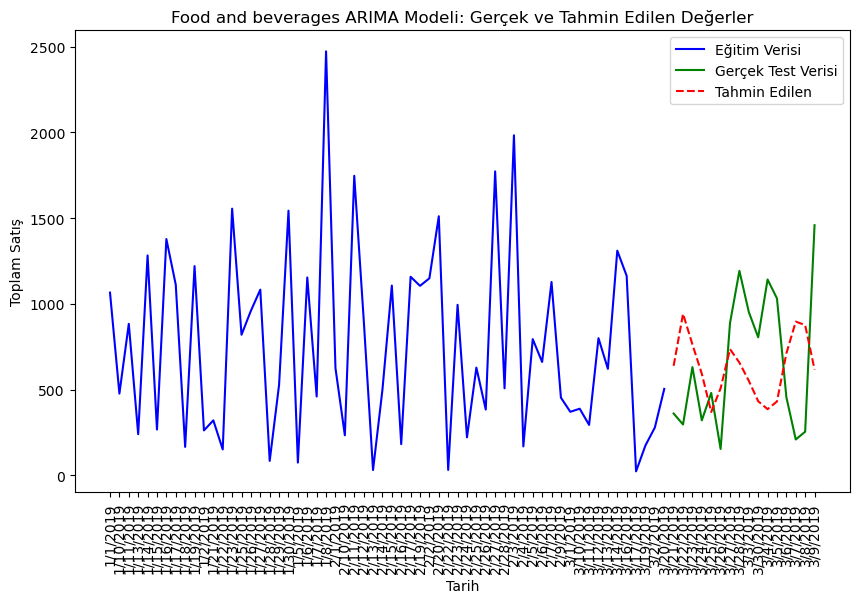


Food and beverages için başarı metrikleri:
Mean Squared Error (MSE): 243622.14
Mean Absolute Error (MAE): 438.53
Root Mean Squared Error (RMSE): 493.58


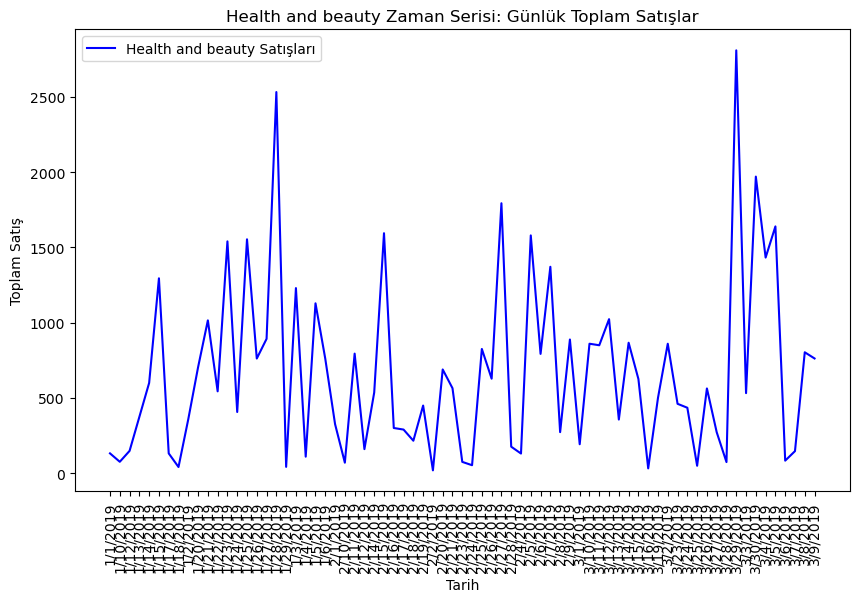

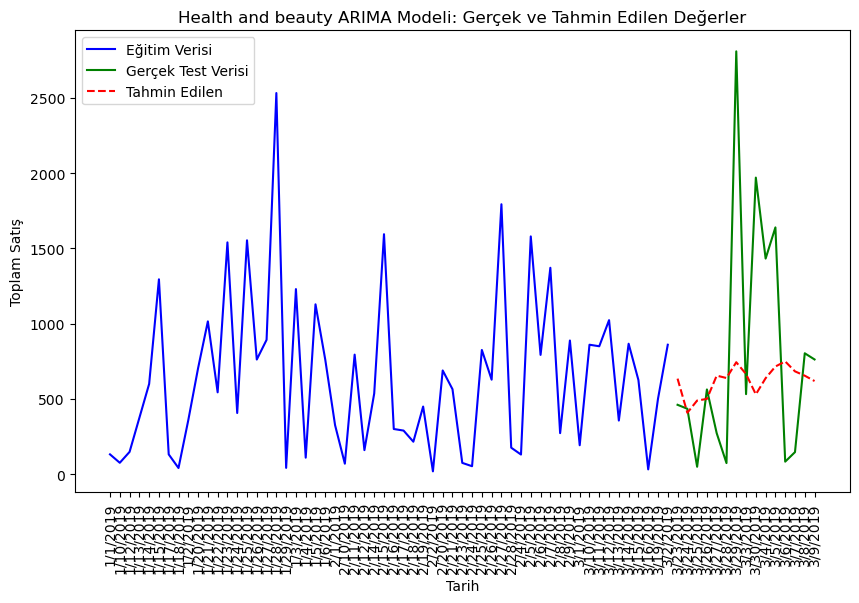


Health and beauty için başarı metrikleri:
Mean Squared Error (MSE): 620672.05
Mean Absolute Error (MAE): 566.85
Root Mean Squared Error (RMSE): 787.83


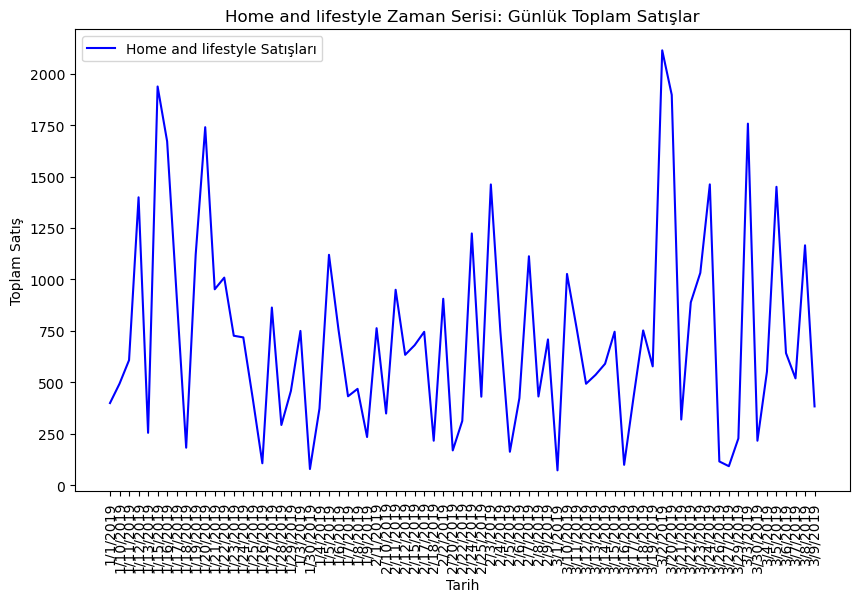

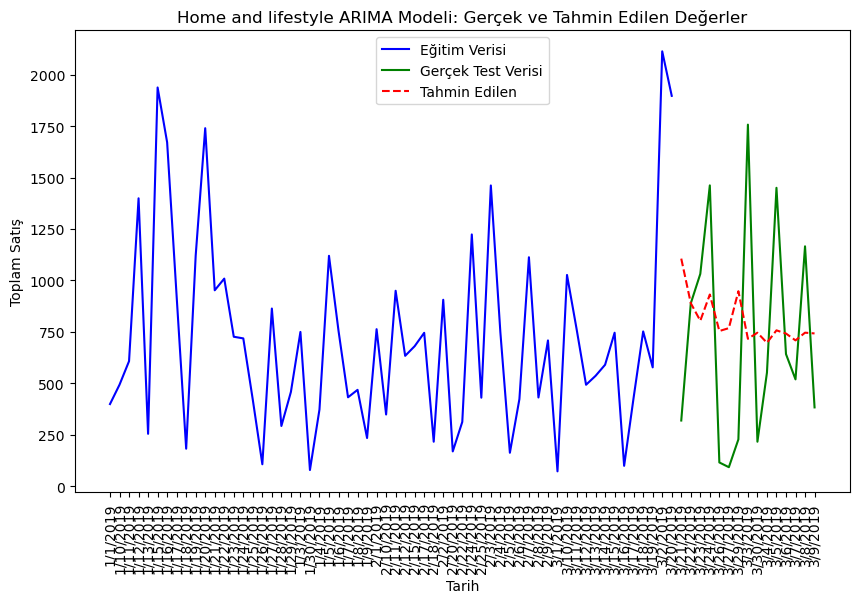


Home and lifestyle için başarı metrikleri:
Mean Squared Error (MSE): 303096.81
Mean Absolute Error (MAE): 470.26
Root Mean Squared Error (RMSE): 550.54


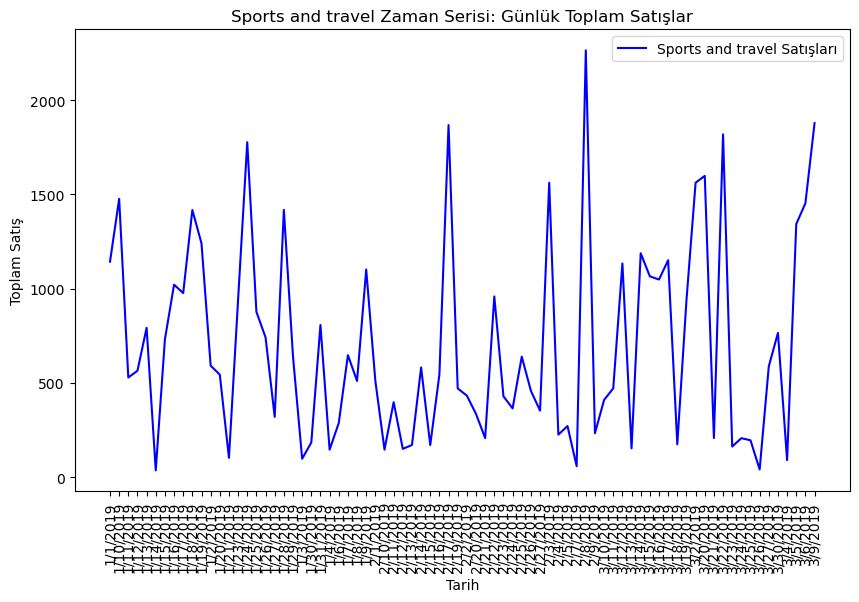

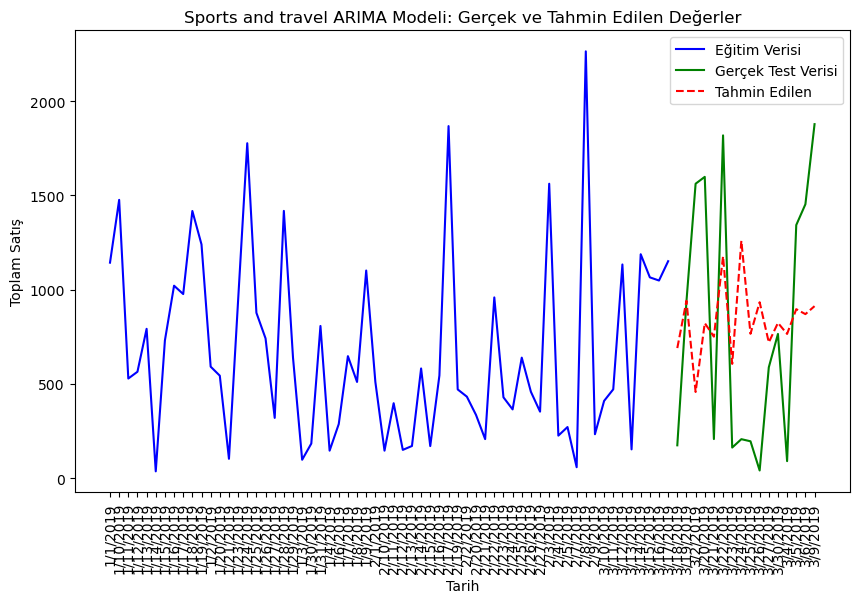


Sports and travel için başarı metrikleri:
Mean Squared Error (MSE): 447796.80
Mean Absolute Error (MAE): 587.55
Root Mean Squared Error (RMSE): 669.18


In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error




# Ürün bazında tarihsel toplam satışları hesaplıyoruz.
product_sales = df.groupby(['Date', 'Product line'])['Total'].sum().reset_index()

# Her bir ürün kategorisi için analiz yapma
unique_products = product_sales['Product line'].unique()

for product in unique_products:
    # Ürün için filtreleme
    product_data = product_sales[product_sales['Product line'] == product]
    product_data = product_data.set_index('Date')

    # Zaman serisini görselleştirme
    plt.figure(figsize=(10, 6))
    plt.plot(product_data['Total'], label=f'{product} Satışları', color='blue')
    plt.title(f'{product} Zaman Serisi: Günlük Toplam Satışlar')
    plt.xlabel('Tarih')
    plt.ylabel('Toplam Satış')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

    # Veriyi eğitim ve test olarak bölme
    train_size = int(len(product_data) * 0.8)
    train_data, test_data = product_data[:train_size], product_data[train_size:]

    # ARIMA Modeli
    try:
        model = ARIMA(train_data['Total'], order=(10, 1, 2))  # Örnek parametreler
        model_fit = model.fit()
    
        # Tahminler
        forecast = model_fit.forecast(steps=len(test_data))

        # Test verileri ve tahminleri görselleştirme
        plt.figure(figsize=(10, 6))
        plt.plot(train_data['Total'], label='Eğitim Verisi', color='blue')
        plt.plot(test_data['Total'], label='Gerçek Test Verisi', color='green')
        plt.plot(test_data.index, forecast, label='Tahmin Edilen', color='red', linestyle='--')
        plt.title(f'{product} ARIMA Modeli: Gerçek ve Tahmin Edilen Değerler')
        plt.xlabel('Tarih')
        plt.ylabel('Toplam Satış')
        plt.xticks(rotation=90)
        plt.legend()
        plt.show()

                # Başarı Metrikleri
        mse = mean_squared_error(test_data['Total'], forecast)
        mae = mean_absolute_error(test_data['Total'], forecast)
        rmse = np.sqrt(mse)

        print(f"\n{product} için başarı metrikleri:")
        print(f"Mean Squared Error (MSE): {mse:.2f}")
        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    except Exception as e:
        print(f"ARIMA modellemesi {product} için başarısız oldu: {e}")


In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Ürün bazında tarihsel toplam satışları hesaplıyoruz.
product_sales = df.groupby(['Date', 'Product line'])['Total'].sum().reset_index()

# Her bir ürün kategorisi için analiz yapma
unique_products = product_sales['Product line'].unique()

for product in unique_products:
    print(f"\n{product} LSTM model tahmini başlatılıyor...")
    
    # Ürün için filtreleme
    product_data = product_sales[product_sales['Product line'] == product]
    product_data = product_data[['Date', 'Total']]
    product_data.set_index('Date', inplace=True)
    
    # Veriyi ölçeklendirme
    scaler = MinMaxScaler()
    product_data_scaled = scaler.fit_transform(product_data)

    # Eğitim ve test veri setlerinin oluşturulması
    train_size = int(len(product_data_scaled) * 0.8)
    train_data = product_data_scaled[:train_size]
    test_data = product_data_scaled[train_size:]
    
    # Zaman serisi verisini LSTM giriş formatına dönüştürme
    def create_sequences(data, time_steps=10):
        X, y = [], []
        for i in range(len(data) - time_steps):
            X.append(data[i:i + time_steps])
            y.append(data[i + time_steps])
        return np.array(X), np.array(y)

    time_steps = 10
    X_train, y_train = create_sequences(train_data, time_steps)
    X_test, y_test = create_sequences(test_data, time_steps)
    
    # LSTM modeli
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(time_steps, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Modeli eğitme
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

    # Tahminler
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Tahminleri ölçekten çıkarma
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    y_train = scaler.inverse_transform(y_train)
    y_test = scaler.inverse_transform(y_test)


    # Forecast next 30 days
    last_sequence = product_data_scaled[-time_steps:]
    future_predictions = []
    current_sequence = last_sequence.reshape(1, time_steps, 1)

    for _ in range(30):
        pred = model.predict(current_sequence)
        future_predictions.append(pred[0, 0])  # Tahmini sakla
        # Yeni tahmini dizinin sonuna ekle
        current_sequence = np.append(current_sequence[:, 1:, :], pred.reshape(1, 1, 1), axis=1)
        
        future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    # Tahminlerin görselleştirilmesi
    plt.figure(figsize=(12, 6))
    plt.plot(product_data.index[:len(train_data)], scaler.inverse_transform(train_data), label="Eğitim Verisi")
    plt.plot(product_data.index[len(train_data):len(train_data) + len(test_data)], scaler.inverse_transform(test_data), label="Test Verisi")
    plt.plot(product_data.index[len(train_data):len(train_data) + len(test_data)], test_predict, label="Tahmin Edilen Test Verisi")
    plt.title(f"{product} Satışları: LSTM Tahminleri")
    plt.legend()
    plt.show()
    
    print(f"{product} için gelecek 30 gün tahminleri:")
    print(future_predictions)


Electronic accessories LSTM model tahmini başlatılıyor...
Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1751  
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1500 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1422 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1085 
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1028 
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1093
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1071
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0885 
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0770 
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0623
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0656 
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0558 
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0686 
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0701
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

AttributeError: 'numpy.ndarray' object has no attribute 'append'